<h1 style="text-align:center;">Лабораторная работа №3</h1>

<h2 style="text-align:center;">Решение системы нелинейных алгебраических уравнений различными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>


Цель: решить выбранные НЛУ и НЛАУ перечисленными методами: 
1. метод простой итерации 
2. метод Ньютона

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

ImportError: DLL load failed while importing _cext: Не найден указанный модуль.

In [209]:
#Используем метод Гаусса для решения СЛАУ из прошлой лабы!
def norm3_vect(vect):
    return pow(sum(el**2 for el in vect), 0.5)

def matr_multipl(A, B):
    
    if A.shape[1] != B.shape[0]: return 
    AB = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                AB[i][j] += A[i][k] * B[k][j]
    
    return AB

def swap_rows(A, row1, row2): #функция для смены строк в матрице
    A[[row1, row2]] = A[[row2, row1]]

def swap_columns(A, col1, col2): #функция для смены столбцов в матрице
    A[:, [col1, col2]] = A[:, [col2, col1]]

def find_max_el(A, iter): #функция для поиска главного элемента матрицы A[iter,iter]
    size = len(A) - iter
    main_element = A[iter,iter]
    i_main, j_main = iter, iter

    for i in range(iter, size): 
        for j in range(iter, size):
            if abs(A[iter:, iter:][i][j]) > abs(main_element):
                i_main, j_main = i, j
                main_element = A[iter:, iter:][i][j]
    return main_element, i_main, j_main

def gauss(A, f):
    size = len(A)
    if A.shape[0] != A.shape[1]:
        print("Матрица не квадратная, решение невозможно!")
        return 
    x = np.arange(size) #массив с порядком корней (порядок будет меняться при перестановке столбцов)

    #прямой ход алгоритма - приводим матрицу A к верхнетреугольному виду
    for iter in range(len(A)):
        ''' Добавим в алгоритм проверку - если на какой-то итерации алгоритма возникла нулевая строка - ответ будет выражаться 
        через одну из переменных (её берем за константу, все остальные переменные будут выражены через нее)'''
        if (len(A) != sum(int(np.any(el)) for el in A)):
            '''Количество переменных превышает количество уравнений, решение не однозначн'''
            print("ERROR! Матрица не квадратная, решение невозможно!")
            return 
        
        main_el, i_main, j_main = find_max_el(A, iter) #максимальный элемент текущей матрицы и его местонахождение
        
        if (i_main != iter): #если элемент еще не в нулевой строке
            swap_rows(A, iter, i_main) #меняем в текущей матрице нулевую строку и строку, содержащую главный элемент            
            swap_rows(f, iter, i_main) #то же самое - в столбце решений       
            
        if (j_main != iter): #если элемент еще не в нулевом столбце
            swap_columns(A, iter, j_main) #меняем в текущей матрице нулевой столбец и столбец, содержащий главный элемент
            #swap_columns(x, iter, j_main) #то же самое - в строке порядка переменных
            x[iter], x[j_main] = x[j_main], x[iter]
        
        if main_el != 0:
            A[iter:, iter:][0] /= main_el #делим нулевую строку текущей матрицы на главный элемент
            f[iter] /= main_el #делим нулевую строку текущего столбца решений на главный элемент
        else:
            print("ERROR! main_el = 0")
            return
    
        for i in range(size - iter - 1):   
            f[i+iter+1] -= (f[iter] * A[iter:, iter:][i+1][0])
            #вычитаем из каждого элемента нулевой в текущем столбце решений, умноженный на нулевой элемент нужной строки - получаем в начале каждой строки единицу
            A[iter:, iter:][i+1] -=  (A[iter:, iter:][0] * A[iter:, iter:][i+1][0])
            #вычитаем из каждой строки нулевую, умноженную на нулевой элемент нужной строки - получаем в начале каждой строки единицу
        
    f[-1] /= A[-1][-1]
    A[size-1][size-1] = 1


    
    #обратный ход алгоритма
    U  = np.zeros((size, 1)) #столбец решений
    for i in range(size-1, -1, -1):
        U[i] = f[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    #перестановка переменных в изначальном порядке
    ans = np.zeros((size, 1))
    for i in range(size):
        ans[int(x[i])] = U[i]
    
    return ans

__<h3 style="text-align:center;">Решение нелинейных алгебраических уравнений</h3>__

**1) Метод простой итерации для НАУ.**

<img src="images\task_lab_3_1.png" alt="drawing" width="600"/>

вариант м
/

In [210]:
#FPI - fixed point iteration
def FPI(f, x0, eps, max_iter):
    x = x0
    iter = 0

    while 1:
        fx = f(x) 
        if isinstance(fx, (int, float)):
            if abs(x - fx) < eps:
                return x, iter
            x = fx
        else:
            print(fx)
            return x, iter
        
        
        
        iter += 1
        if iter >= max_iter:
            print("Превышено максимально допустимое количество итераций")
            break
        

Изучим скорость сходимости метода для начальных приближений, равных 2^n, где n - целые числа

In [211]:
def f(x):
    return 1/np.sqrt(x+1)

x0_1 = []
iters_1 = []
eps = 1.00000e-10
for i in range(-2, 10, 1):
    x0 = 2 ** i
    x0_1.append(x0)
    msa = FPI(f, x0, eps, 10000)
    x, iterations = msa
    iters_1.append(iterations)
    print(x0, x, iterations)


0.25 0.7548776663070152 15
0.5 0.7548776662740349 15
1 0.7548776662246666 15
2 0.7548776662651681 16
4 0.7548776662804131 16
8 0.7548776662951936 16
16 0.7548776663081205 16
32 0.7548776663186453 16
64 0.7548776663268173 16
128 0.7548776662281365 17
256 0.7548776662271606 17
512 0.7548776662264503 17


In [212]:
start_time = time.time()
#вариант м
def f(x):
    try:
        if x == 0:
            raise ZeroDivisionError("Ошибка: деление на ноль!")
        return 1 / (x ** 2) - 1
    except ZeroDivisionError as e:
        return str(e)


x0_2 = []
iters_2 = []
eps = 1.00000e-10
for i in range(-2, 10, 1):
    x0 = 2 ** i
    x0_2.append(x0)
    msa = FPI(f, x0, eps, 10000)
    x, iterations = msa
    iters_2.append(iterations)
    print(x0, x, iterations)

time_msa = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_msa))

Ошибка: деление на ноль!
0.25 0.0 9
Ошибка: деление на ноль!
0.5 0.0 12
Ошибка: деление на ноль!
1 0.0 1
Ошибка: деление на ноль!
2 0.0 17
Ошибка: деление на ноль!
4 0.0 11
Ошибка: деление на ноль!
8 0.0 8
Ошибка: деление на ноль!
16 0.0 8
Ошибка: деление на ноль!
32 0.0 8
Ошибка: деление на ноль!
64 0.0 8
Ошибка: деление на ноль!
128 0.0 8
Ошибка: деление на ноль!
256 0.0 5
Ошибка: деление на ноль!
512 0.0 5
Время выполнения = 1.0009 мс


Видим, что некоторый выбор функции может быть неудачным - мы выйдем за границы области определения функции.

**2) Метод Ньютона для НАУ.**

In [213]:
def newton(f, df, x0, eps, max_iter = 1000):
    x = x0
    for i in range(max_iter):
        try:
            x_next = x - f(x) / df(x)
            if abs(x_next - x) < eps:
                return x_next, i
            x = x_next

        except ZeroDivisionError:
            print("Ошибка: деление на ноль!")
            return None
        
        except ValueError as e:
            print(f"Ошибка: {e}")
            return None
    
    print("Достигнуто максимальное количество итераций.")
    return x, i

Исследуем зависимость итераций алгоритма нахождения корня уравнения от начального приближения - будем выбирать его в окрестности корня радиуса 0,5.

In [214]:
def f(x):
    if x + 1 < 0:  # Проверяем, чтобы подкоренное выражение было положительным
        raise ValueError("Недопустимое значение: x + 1 должно быть >= 0")
    return np.sqrt(x + 1) - 1 / x

def df(x):
    if x + 1 < 0: # Проверяем, чтобы подкоренное выражение было положительным
        raise ValueError("Недопустимое значение: x + 1 должно быть >= 0")
    return 1 / (2 * np.sqrt(x + 1)) + 1 / (x ** 2)


x0_newt = []
iter_newt = []
x0 = 0.1
while x0 < 1.4:
    # Начальное приближени
    N = newton(f, df, x0, eps)
    if N is not None:
        x, iter = N[0], N[1] 
        print(f" При x0 = {x0:.2f} найденное решение: {x:.10f}")

        x0_newt.append(x0)
        iter_newt.append(iter)
        x0 += 0.05

 При x0 = 0.10 найденное решение: 0.7548776662
 При x0 = 0.15 найденное решение: 0.7548776662
 При x0 = 0.20 найденное решение: 0.7548776662
 При x0 = 0.25 найденное решение: 0.7548776662
 При x0 = 0.30 найденное решение: 0.7548776662
 При x0 = 0.35 найденное решение: 0.7548776662
 При x0 = 0.40 найденное решение: 0.7548776662
 При x0 = 0.45 найденное решение: 0.7548776662
 При x0 = 0.50 найденное решение: 0.7548776662
 При x0 = 0.55 найденное решение: 0.7548776662
 При x0 = 0.60 найденное решение: 0.7548776662
 При x0 = 0.65 найденное решение: 0.7548776662
 При x0 = 0.70 найденное решение: 0.7548776662
 При x0 = 0.75 найденное решение: 0.7548776662
 При x0 = 0.80 найденное решение: 0.7548776662
 При x0 = 0.85 найденное решение: 0.7548776662
 При x0 = 0.90 найденное решение: 0.7548776662
 При x0 = 0.95 найденное решение: 0.7548776662
 При x0 = 1.00 найденное решение: 0.7548776662
 При x0 = 1.05 найденное решение: 0.7548776662
 При x0 = 1.10 найденное решение: 0.7548776662
 При x0 = 1.1

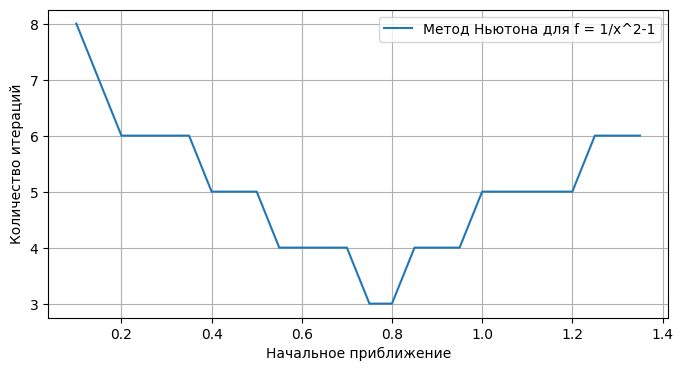

In [215]:
plt.figure(figsize = [8,4])

plt.plot(x0_newt, iter_newt, label = "Метод Ньютона для f = 1/x^2-1")

plt.xlabel('Начальное приближение')
plt.ylabel('Количество итераций')


plt.legend()
plt.grid()
plt.show()

Как можно видеть, количество итераций алгоритма тем меньше, чем ближе начальное приближение к корню.



__<h3 style="text-align:center;">Решение систем нелинейных алгебраических уравнений</h3>__

**1) Метод простой итерации для СНАУ.**

<img src="images\task_lab_3_2.png" alt="drawing" width="600"/>

 вариант б)

In [216]:
def FPI_(fx, fy, x0, y0, eps=1e-6, max_iter=100):
    x = x0
    y = y0
    iter = 0

    while iter < max_iter:
        try:
            f_x = fx(x, y)
            f_y = fy(x)
            
            # Проверка на допустимость значений
            if not (isinstance(f_x, (int, float)) and isinstance(f_y, (int, float))):
                raise ValueError(f"Некорректное значение: f_x={f_x}, f_y={f_y}")
            
            # Критерий остановки
            if (abs(x - f_x) < eps) and (abs(y - f_y) < eps):
                return x, y, iter 
            
            # Обновление значений
            x = f_x
            y = f_y
        
        except ValueError as e:
            print(f"Ошибка на итерации {iter + 1}: {e}")
            break
        
        iter += 1
    
    print("Превышено максимально допустимое количество итераций.")
    return x, y, iter


In [217]:
def fx(x, y):
    try:
        value = np.tan(x * y + 0.4)
        if value < 0:
            raise ValueError("Подкоренное выражение отрицательно в sqrt.")
        return np.sqrt(value)
    except ValueError as e:
        return np.nan  # Возвращаем NaN вместо строки для обработки ошибки

def fy(x):
    try:
        s = (1 - 0.6 * x**2) / 2
        if s < 0:
            raise ValueError("Подкоренное выражение отрицательно в sqrt.")
        return np.sqrt(s)
    except ValueError as e:
        return np.nan  # Возвращаем NaN вместо строки

Задаем начальные приближения недалеко от корня, который можем примерно определить, построив графики функций (см рисунок).
Если начальное приближение будет далеко от корня, можем попасть в область, где функция неопределена.

<img src="images\lab3_graph.png" alt="drawing" width="1000"/>


In [218]:
(FPI_(fx, fy, -1, 0.4, eps, 1000))

Превышено максимально допустимое количество итераций.


(np.float64(nan), np.float64(nan), 1000)

In [219]:
(FPI_(fx, fy, -1, -0.4, eps, 1000))

(np.float64(1.0484001411328012), np.float64(0.4126222767849122), 233)

**2) Метод Ньютона для СНАУ.**

In [220]:
a = 20 #константа - зависит от варианта задания a = 20
size = 100 #размер матриц = 100

A = ((a-1)*np.eye(size) + np.ones(size)) #матрица А

B = np.zeros((size, 1)) 

for i in range(size): B[i] = i + 1 # столбец решений f
# проверка как мой Гаусс работает
print(norm3_vect(np.linalg.solve(A, B) - gauss(A, B)))

[1.45198626e-14]


In [221]:
def newton_(f1, f2, J, x0, y0, eps=1e-6, max_iter=100, lambda_=0.5):
    x, y = x0, y0
    
    for iter_count in range(max_iter):
        F = np.array([f1(x, y), f2(x, y)])
        delta = gauss(J(x, y), F) # моя функция решения СЛАУ
        
        x_next = x - lambda_ * delta[0][0]  # [0][0] - это первый элемент в столбце
        y_next = y - lambda_ * delta[1][0]  # [1][0] - это второй элемент в столбце
        
        if np.sqrt((x_next - x)**2 + (y_next - y)**2) < eps:
            return x_next, y_next, iter_count + 1
        
        x, y = x_next, y_next
    
    print("Достигнуто максимальное количество итераций.")
    return x, y, iter_count + 1

In [222]:
def f1(x, y):
    return 1 * np.sqrt(np.tan(x * y + 0.4)) - x

def f2(x, y):
    return 1 * np.sqrt((1 - 0.6 * x**2) / 2) - y  

# Якобиан системы
def J(x, y):
    return np.array([
        [(1 / (-2 * np.sqrt(np.tan(x * y + 0.4)))) * (1 / (np.cos(x * y + 0.4)**2)) * y - 1, (1 / (2 * np.sqrt(np.tan(x * y + 0.4)))) * (1 / (np.cos(x * y + 0.4)**2)) * x],
        [-0.6 * x / np.sqrt((1 - 0.6 * x**2) / 2), -1]
    ])
# вместо Якобиана удобнее использовать производные численными методами из 1й лабы!!! исправить

In [223]:
x0, y0 = 1.0, 0.4

x, y, iterations = newton_(f1, f2, J, x0, y0)
print(f"Найденное решение: x = {x}, y = {y}, за {iterations} итераций")

Найденное решение: x = 1.048397349965631, y = 0.4126226543037897, за 38 итераций


In [224]:
def f1(x, y):
    return -1 * np.sqrt(np.tan(x * y + 0.4)) - x

def f2(x, y):
    return -1 * np.sqrt((1 - 0.6 * x**2) / 2) - y  

# Якобиан системы
def J(x, y):
    return np.array([
        [(1 / (-2 * np.sqrt(np.tan(x * y + 0.4)))) * (1 / (np.cos(x * y + 0.4)**2)) * y - 1, (1 / (-2 * np.sqrt(np.tan(x * y + 0.4)))) * (1 / (np.cos(x * y + 0.4)**2)) * x],
        [-0.6 * x / (-1)*np.sqrt((1 - 0.6 * x**2) / 2), -1]
    ])

In [225]:
x0, y0 = -1.0, -0.4

x, y, iterations = newton_(f1, f2, J, x0, y0)
print(f"Найденное решение: x = {x}, y = {y}, за {iterations} итераций")

Найденное решение: x = -1.048400141096356, y = -0.4126232052307608, за 14 итераций
